In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

## Read data

In [ ]:
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

100%|██████████| 58.4k/58.4k [00:00<00:00, 40.2MB/s]

Extracting files...


In [ ]:
data = pd.read_csv(path + '/framingham.csv')

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
data.education.value_counts()

,count
education,
1.0,1720
2.0,1253
3.0,687
4.0,473


In [ ]:
data.education = data.education.fillna(value=0)

In [ ]:
data.education.value_counts()

,count
education,
1.0,1720
2.0,1253
3.0,687
4.0,473
0.0,105


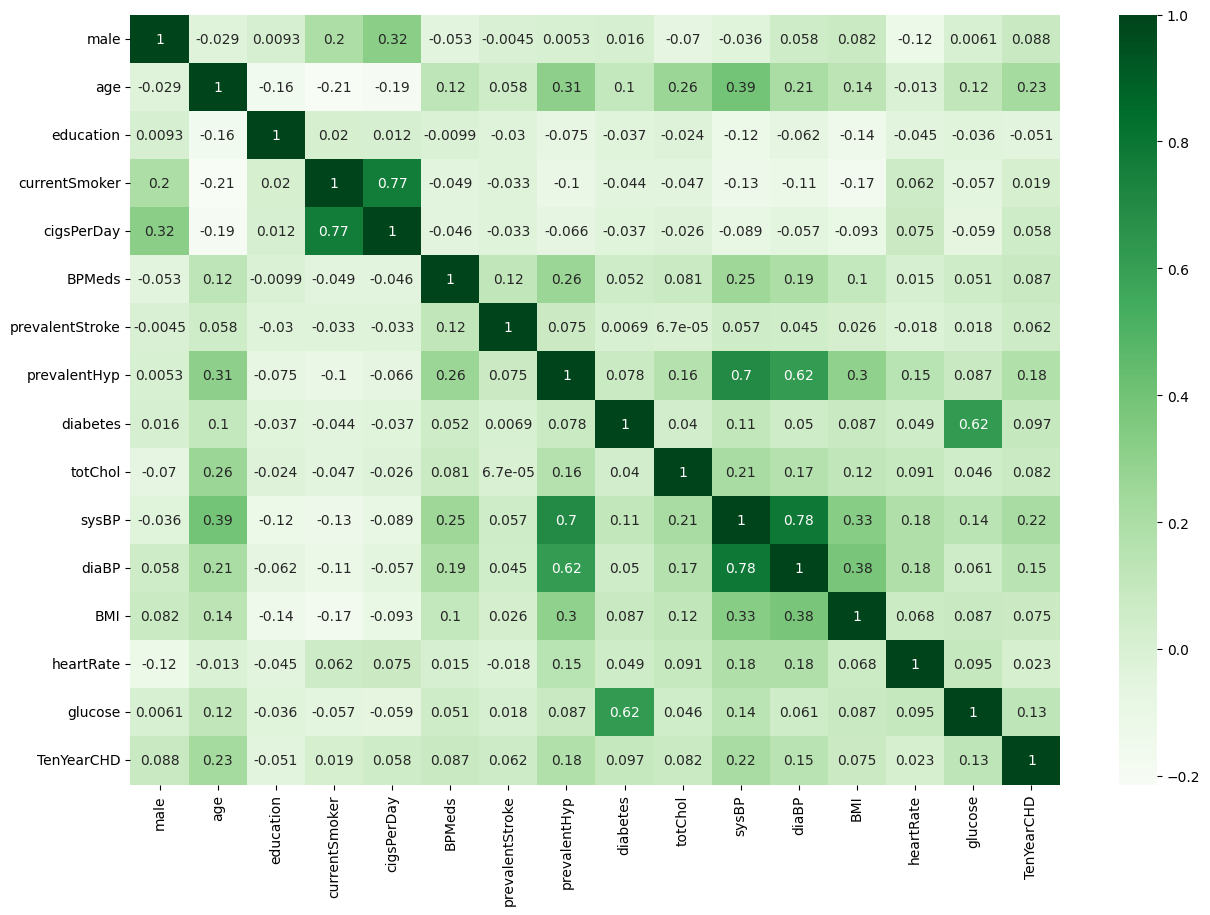

In [ ]:
corr = data.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

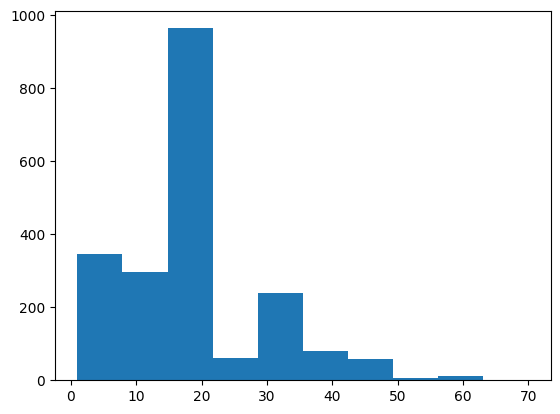

In [ ]:
plt.hist(x=data[data.currentSmoker == 1].cigsPerDay, bins=10)
plt.show()

In [ ]:
data.currentSmoker.value_counts()

,count
currentSmoker,
0,2144
1,2094


In [ ]:
data[(data.currentSmoker == 1) & (data.cigsPerDay.isna())]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
currSmoker_nullidx = data[(data.currentSmoker == 1) & (data.cigsPerDay.isna())].index

In [ ]:
data[data.currentSmoker == 1].cigsPerDay.median()

20.0

In [ ]:
data.loc[currSmoker_nullidx, 'cigsPerDay'] = data[data.currentSmoker == 1].cigsPerDay.median()

In [ ]:
data.loc[currSmoker_nullidx, 'cigsPerDay']

,cigsPerDay
131,20.0
139,20.0
1046,20.0
1292,20.0
1347,20.0
1451,20.0
1497,20.0
1610,20.0
1625,20.0
1870,20.0


In [ ]:
data.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
data.BPMeds.value_counts()

,count
BPMeds,
0.0,4061
1.0,124


In [ ]:
data.BPMeds = data.BPMeds.fillna(value=2)

In [ ]:
data[data.prevalentHyp == 1].totChol.describe()

,totChol
count,1301.000000
mean,247.613374
std,47.698109
min,107.000000
25%,216.000000
50%,245.000000
75%,273.000000
max,696.000000


In [ ]:
data[data.prevalentHyp == 0].totChol.describe()

,totChol
count,2887.000000
mean,231.813301
std,42.216280
min,113.000000
25%,202.000000
50%,229.000000
75%,258.000000
max,464.000000


In [ ]:
medians = data.groupby('prevalentHyp')['totChol'].median()

In [ ]:
medians

,totChol
prevalentHyp,
0,229.0
1,245.0


In [ ]:
def replace_null_with_median(row, medians, numerical_col, categorical_col):
  if pd.isnull(row[numerical_col]):
    return medians[row[categorical_col]]
  else:
    return row[numerical_col]

In [ ]:
data.totChol = data.apply(lambda row : replace_null_with_median(row, medians, 'totChol', 'prevalentHyp'), axis=1)

In [ ]:
data.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
data[data.prevalentHyp == 0].BMI.describe()

,BMI
count,2910.000000
mean,24.977550
std,3.537185
min,15.540000
25%,22.540000
50%,24.680000
75%,27.140000
max,44.270000


In [ ]:
data[data.prevalentHyp == 1].BMI.describe()

,BMI
count,1309.000000
mean,27.634836
std,4.580788
min,15.960000
25%,24.650000
50%,27.010000
75%,29.820000
max,56.800000


In [ ]:
medians_BMI = data.groupby('prevalentHyp')['BMI'].median()

In [ ]:
data.BMI = data.apply(lambda row : replace_null_with_median(row, medians_BMI, 'BMI', 'prevalentHyp'), axis=1)

In [ ]:
data[data.heartRate.isna()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [ ]:
data.heartRate.median()

75.0

In [ ]:
data.loc[data[data.heartRate.isna()].index, 'heartRate'] = data.heartRate.median()

In [ ]:
median_diabetes = medians_BMI = data.groupby('diabetes')['glucose'].median()

In [ ]:
median_diabetes

,glucose
diabetes,
0,78.0
1,145.0


In [ ]:
data.glucose = data.apply(lambda row : replace_null_with_median(row, median_diabetes, 'glucose', 'diabetes'), axis=1)

In [ ]:
data.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


* De verificat outliere!!

## Model analysis

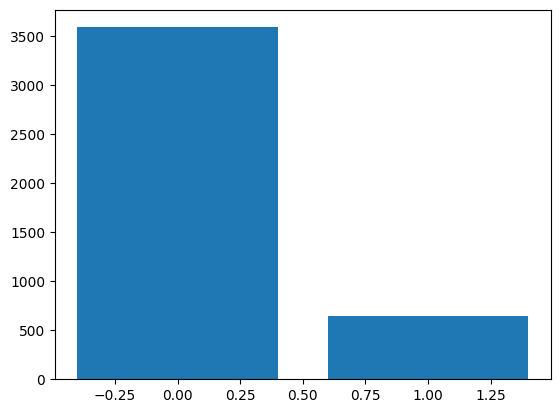

In [ ]:
plt.bar(data.TenYearCHD.value_counts().index, data.TenYearCHD.value_counts().values)
plt.show()
## Setul de date este imbalansat

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,2.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train[num_features])
X_test_scaled = scaler_X.transform(X_test[num_features])

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definim parametrii, inclusiv solverul
parameters = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Modelul Logistic Regression
# In cazul seturilor de date imbalansate, modelele pot "favoriza" clasa majoritara, asadar acest weight in antrenare are rolul de a face exemplele din clasa minoritara sa contribuie mai mult la optimizare.
# Folosit neaparat in cazul in care se prioritizeaza clasa minoritara (deseori).
logreg = LogisticRegression(max_iter=200, tol=1e-6, class_weight='balanced')

# Scorul personalizat: folosim mai multe scoruri simultan
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score)
}

# GridSearchCV cu scorurile personalizate
clf = GridSearchCV(logreg, parameters, cv=5, scoring=scoring, refit='f1')
clf.fit(X_train_scaled, y_train)

# Afișăm cei mai buni parametri
print("Best parameters:", clf.best_params_)

# Obținem metricile pentru fiecare configurație de model
results = clf.cv_results_

# Extragerea metricei pentru fiecare configurație
for i in range(len(results['params'])):
    print(f"Configurație: {results['params'][i]}")
    print(f"   Accuracy: {results['mean_test_accuracy'][i]:.4f}")
    print(f"   Recall: {results['mean_test_recall'][i]:.4f}")
    print(f"   F1 Score: {results['mean_test_f1'][i]:.4f}")
    print(f"   Precision: {results['mean_test_precision'][i]:.4f}")

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Configurație: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
   Accuracy: 0.6640
   Recall: 0.6731
   F1 Score: 0.3801
   Precision: 0.2652
Configurație: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
   Accuracy: 0.6714
   Recall: 0.6615
   F1 Score: 0.3811
   Precision: 0.2680
Configurație: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
   Accuracy: 0.6676
   Recall: 0.6577
   F1 Score: 0.3772
   Precision: 0.2648
Configurație: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
   Accuracy: 0.6678
   Recall: 0.6577
   F1 Score: 0.3774
   Precision: 0.2651
Configurație: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
   Accuracy: 0.6681
   Recall: 0.6596
   F1 Score: 0.3783
   Precision: 0.2656
Configurație: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
   Accuracy: 0.6678
   Recall: 0.6577
   F1 Score: 0.3774
   Precision: 0.2651
Configurație: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
   Accuracy: 0.6684
  

In [ ]:
best_model = clf.best_estimator_

# Aplicăm modelul pe setul de test
y_test_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.6392
Recall: 0.5968
F1 Score: 0.3260
Precision: 0.2242


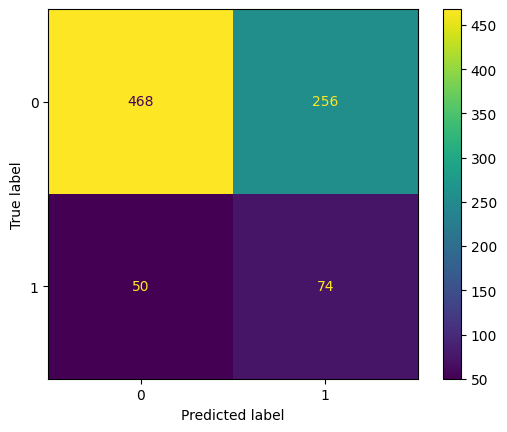

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
# Afișăm matricea direct
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

Accuracy: 0.8255
Recall: 0.1774
F1 Score: 0.2292
Precision: 0.3235


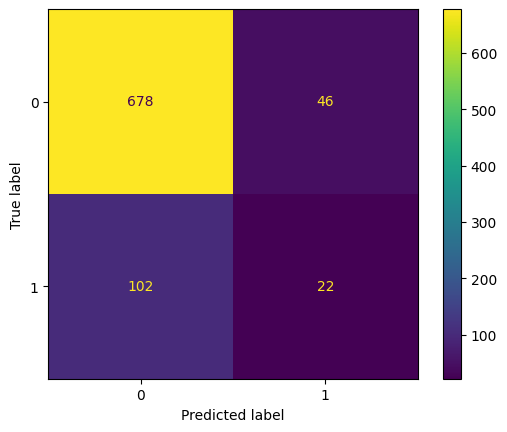

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

Accuracy: 0.8255
Recall: 0.1290
F1 Score: 0.1778
Precision: 0.2857


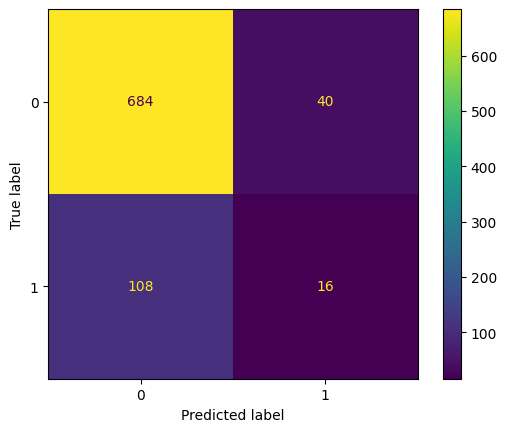

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly', degree=4, C=0.01, class_weight='balanced', gamma=0.2)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.5932
Recall: 0.6855
F1 Score: 0.3301
Precision: 0.2174


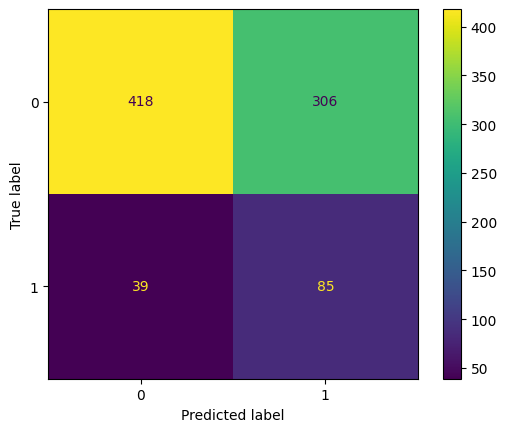

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=0.1, tol=0.01)
svm_model.fit(X_resampled, y_resampled)
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()